In [1]:
import pandas
movies = pandas.read_csv("fandango_score_comparison.csv")

(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

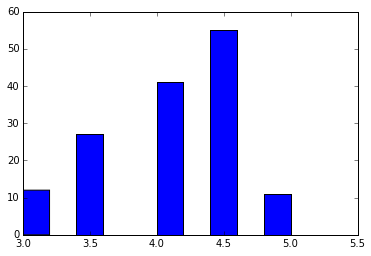

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(movies["Fandango_Stars"])

(array([  1.,   2.,  20.,  14.,   0.,  22.,  27.,  20.,  25.,  15.]),
 array([ 0.5,  0.9,  1.3,  1.7,  2.1,  2.5,  2.9,  3.3,  3.7,  4.1,  4.5]),
 <a list of 10 Patch objects>)

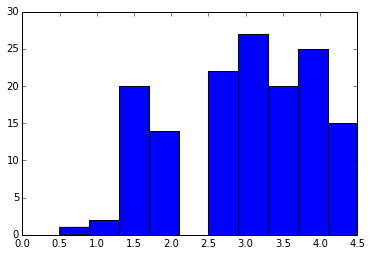

In [3]:
plt.hist(movies["Metacritic_norm_round"])

In [4]:
import numpy

f_mean = movies["Fandango_Stars"].mean()
m_mean = movies["Metacritic_norm_round"].mean()
f_std = movies["Fandango_Stars"].std()
m_std = movies["Metacritic_norm_round"].std()
f_median = movies["Fandango_Stars"].median()
m_median = movies["Metacritic_norm_round"].median()

print(f_mean)
print(m_mean)
print(f_std)
print(m_std)
print(f_median)
print(m_median)

4.08904109589
2.97260273973
0.540385977979
0.990960561374
4.0
3.0


Fandango vs Metacritic Methodology
Fandango appears to inflate ratings and isn't transparent about how it calculates and aggregates ratings. Metacritic publishes each individual critic rating, and is transparent about how they aggregate them to get a final rating.
Fandango vs Metacritic number differences
The median metacritic score appears higher than the mean metacritic score because a few very low reviews "drag down" the median. The median fandango score is lower than the mean fandango score because a few very high ratings "drag up" the mean.
Fandango ratings appear clustered between 3 and 5, and have a much narrower random than Metacritic reviews, which go from 0 to 5.
Fandango ratings in general appear to be higher than metacritic ratings.
These may be due to movie studio influence on Fandango ratings, and the fact that Fandango calculates its ratings in a hidden way.

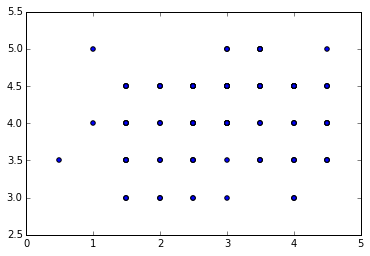

In [5]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [6]:
movies["fm_diff"] = numpy.abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])

In [7]:
movies.sort("fm_diff", ascending=False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3


In [8]:
from scipy.stats import pearsonr
r_value, p_value = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
r_value

0.17844919073895918

In [9]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [10]:
pred = 3 * slope + intercept
pred

4.0917071528212041

In [11]:
4 * slope + intercept

4.1890182307951322

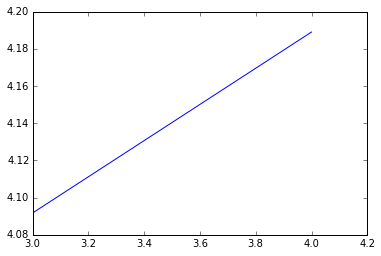

In [17]:
x=[3.0,4.0]
y=[pred1,pred2]
plt.plot(x,y)

That's it for the guided steps! We recommend exploring the data more on your own.

Here are some potential next steps:

Explore the other rating services, IMDB and RottenTomatoes.
See how they differ from each other.
See how they differ from Fandango.
See how user scores differ from critic scores.
Acquire more recent review data, and see if the pattern of Fandango inflating reviews persists.
Dig more into why certain movies had their scores inflated more than others.